<a href="https://colab.research.google.com/github/YigitBCesur/Auto-Insurance-Industry/blob/main/Auto_Insurance_Edureka_project_YBC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

from imblearn import under_sampling, over_sampling, pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import iqr

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier,BaggingRegressor
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss,confusion_matrix,accuracy_score ,classification_report, make_scorer, mean_squared_error 
from sklearn.metrics import precision_score, recall_score, roc_auc_score,f1_score,average_precision_score,precision_recall_curve,roc_curve, auc, roc_auc_score

#Dataset Description and EDA


The project involves the use of a dataset with about 600K data and 59 features/data. 

In this dataset , 
- Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). 
- feature names include the postfix 'bin' to indicate binary features and 'cat' to indicate categorical features. 
- Features without these designations are either continuous or ordinal. 
- Values of -1 indicate that the feature was missing from the observation. 
- The target column signifies whether a claim was filed for that policy holder.

In [ ]:
AutoInsurance=pd.read_csv('Auto Insurance ML.csv')
data=AutoInsurance.copy()
data.shape

(595212, 59)

In [ ]:
data.drop(columns=["id"],inplace=True)

In [ ]:
data.shape

(595212, 58)

In [ ]:
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_

#Exploratory Data Analysis

1. Write at least 3 important inferences from the data above

- Let us take the hypothesis as - Can we increase the company profit by identifying the customers who are likely to claim insurance this year

Some inferences:

* The feature "id" is an  unnecessary variable.

* The following features are highly correlated to each other:
    * "ps_ind_06_bin" and "ps_ind_07_bin"
    * "ps_ind_16_bin" and "ps_ind_18_bin"
    * "ps_ind_16_bin" and "ps_ind_17_bin"
    * "ps_car_13" and "ps_car_02_cat"
    
* We'll substitute the rest of the missing values either through mean or mode.

* None of the feature is highly correlated to the target feature.

* Features with `calc` are weakly correlated to all the other features.

### --->  Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

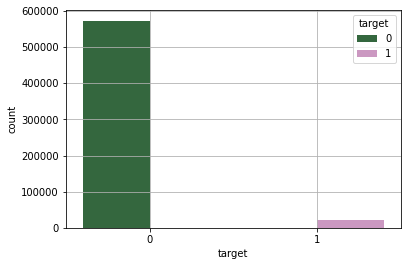

In [ ]:
sns.countplot(x = 'target',hue = 'target',data = data, palette='cubehelix')
plt.grid()
plt.show()

- Looking at the distribution, we can actually say that there are very less customers claiming insurance. 
- This means, majority of customers are not claiming the insurance. These customers are profit makers for the company
- If we can identify customers who are less likely to claim insurances and charge them less for their insurance, they would not leave the company. This also improves the market share.
- It is also important to identify the customers who are very likely to claim insurance and either deny insurance or increase their insurance. This would reduce the risk to the company.

In [ ]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
data['target'].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

- **No, we can say by above information it is not balanced dataset. The given data is `Imbalanced`**

*   Unclaiming insurance  %96.35
*   Claiming insurance %0.0365

- With the distribution above, we can actually say that there are very less customers claiming insurance. Majority of customers are not claiming the insurance. These customers are profit makers for the company

- If we can identify customers who are less likely to claim insurances and charge them less for their insurance, they would not leave the company. This also improves the market share.
- It is also important to identify the customers who are very likely to claim insurance and either deny insurance or increase their insurance. This would reduce the risk to the company.

### ---> How many categorical features are there?

In [ ]:
data.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [ ]:
data.dtypes

target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01  

In [ ]:
categorical_count=0
categorical_features=[]
for col in data.columns:
  if 'cat' in col:
    categorical_count=categorical_count+1
    categorical_features.append(col)
print(categorical_features)
print('Number of CATEGORICAL FEATURES =',categorical_count)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
Number of CATEGORICAL FEATURES = 14


### ---> How many binary features are there?

In [ ]:
binary_count=0
binary_features=[]
for col in data.columns:
  if 'bin' in col:
    binary_count=binary_count+1
    binary_features.append(col)
print(binary_features)
print('Count of BINARY FEATURES =',binary_count)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
Count of BINARY FEATURES = 17


5. Write inferences from data on interval variables.

In [ ]:
interval_features=[]
for column in data.columns:
  if (column not in categorical_features) & (column not in binary_features) & (column!='target'):
    interval_features.append(column)
print(interval_features)
print('Count of INTERVAL FEATURES =',len(interval_features))

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
Count of INTERVAL FEATURES = 26


In [ ]:
data[interval_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_14,595212.0,0.012451,0.127545,0.000000,0.000000,0.000000,0.000000,4.000000
ps_ind_15,595212.0,7.299922,3.546042,0.000000,5.000000,7.000000,10.000000,13.000000
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_reg_03,595212.0,0.551102,0.793506,-1.000000,0.525000,0.720677,1.000000,4.037945
ps_car_11,595212.0,2.346072,0.832548,-1.000000,2.000000,3.000000,3.000000,3.000000
ps_car_12,595212.0,0.379945,0.058327,-1.000000,0.316228,0.374166,0.400000,1.264911
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.670867,0.765811,0.906190,3.720626


### ---> Write inferences from data on ordinal variables.


<Figure size 432x288 with 0 Axes>

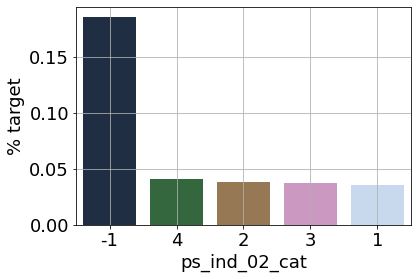

<Figure size 432x288 with 0 Axes>

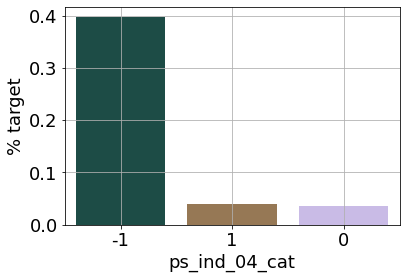

<Figure size 432x288 with 0 Axes>

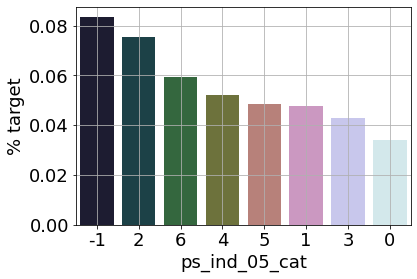

<Figure size 432x288 with 0 Axes>

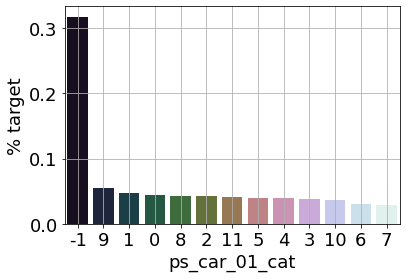

<Figure size 432x288 with 0 Axes>

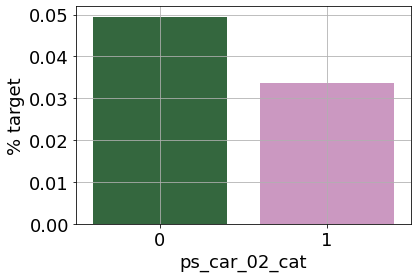

<Figure size 432x288 with 0 Axes>

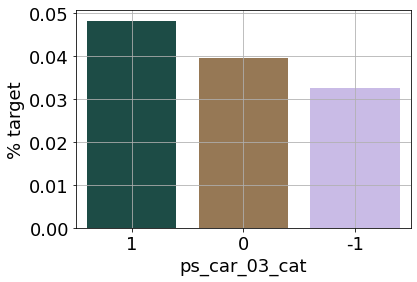

<Figure size 432x288 with 0 Axes>

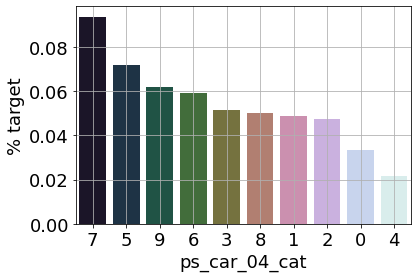

<Figure size 432x288 with 0 Axes>

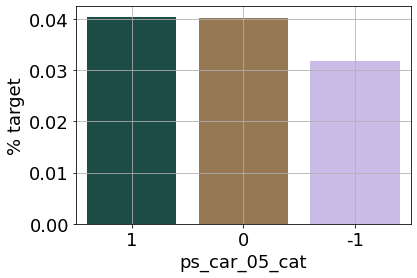

<Figure size 432x288 with 0 Axes>

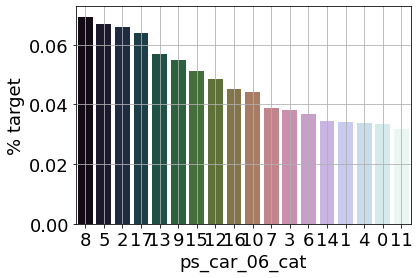

<Figure size 432x288 with 0 Axes>

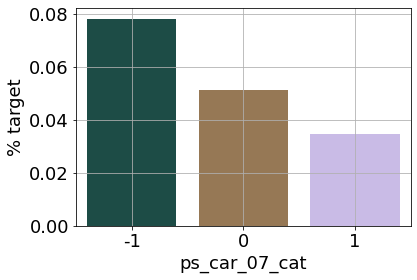

<Figure size 432x288 with 0 Axes>

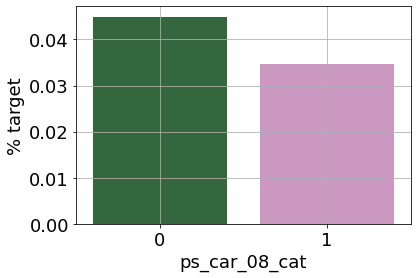

<Figure size 432x288 with 0 Axes>

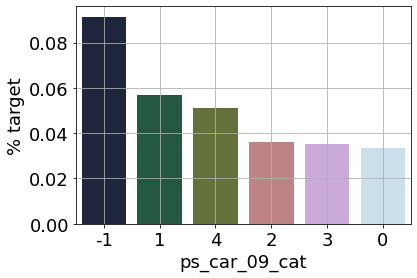

<Figure size 432x288 with 0 Axes>

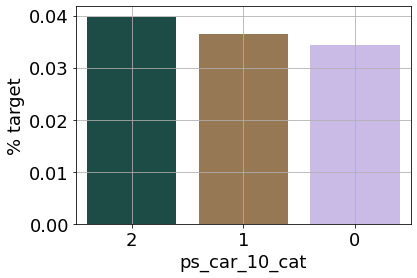

<Figure size 432x288 with 0 Axes>

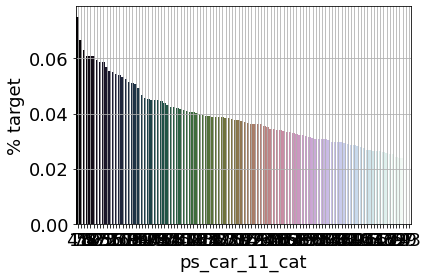

In [ ]:
for c in categorical_features:
    plt.figure()
    fig, ax = plt.subplots(figsize=(6,4))
    # Calculate the percentage of target=1 per category value
    perc_of_categoricals = data[[c, 'target']].groupby([c],as_index=False).mean()
    perc_of_categoricals.sort_values(by='target', ascending=False, inplace=True)
    
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=c, y='target', data=perc_of_categoricals, order=perc_of_categoricals[c], palette='cubehelix')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(c, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.grid()
    plt.show();

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

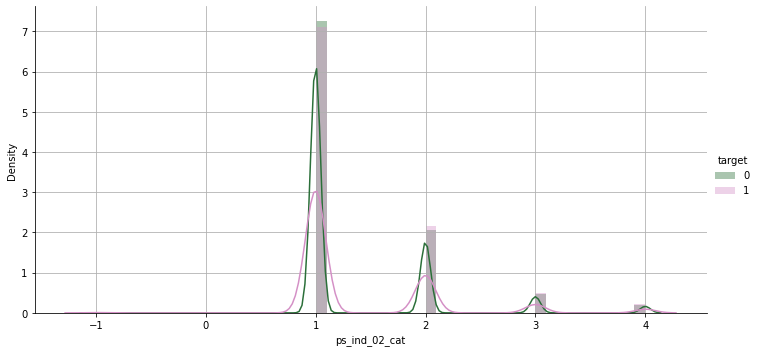

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

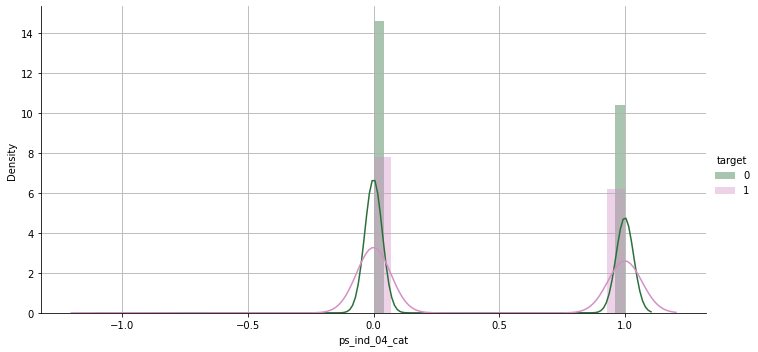

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

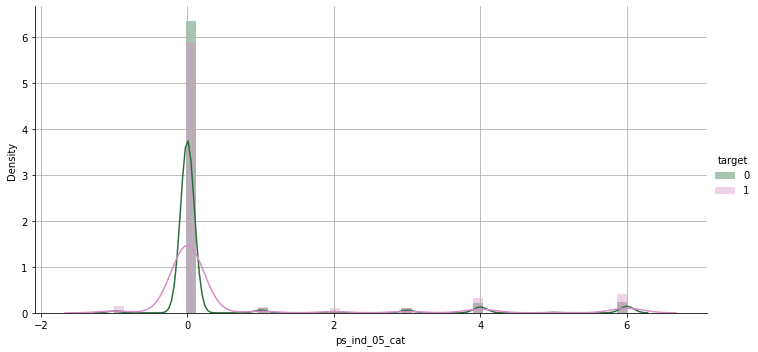

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

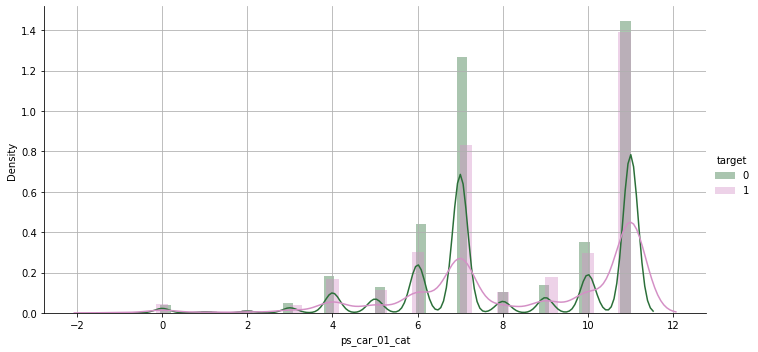

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

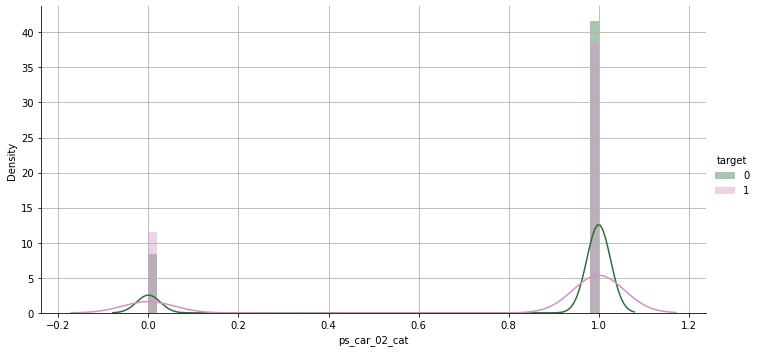

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

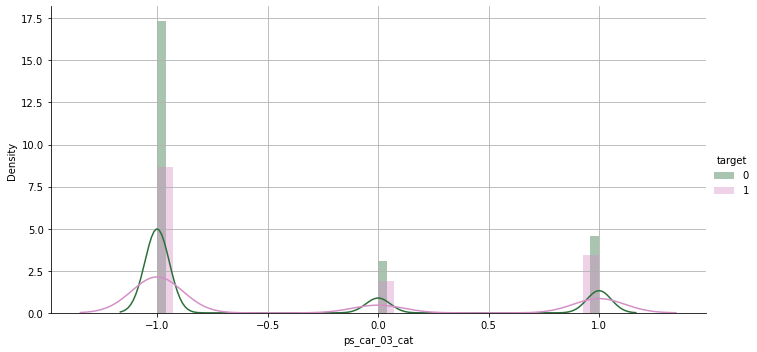

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

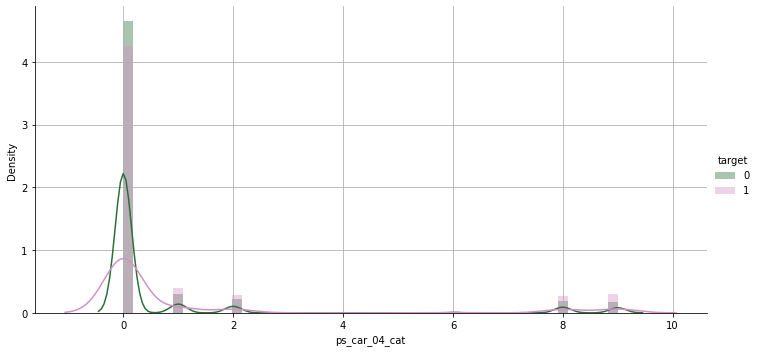

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

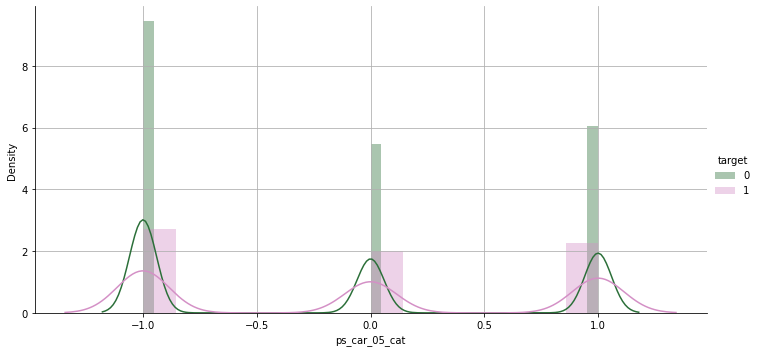

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

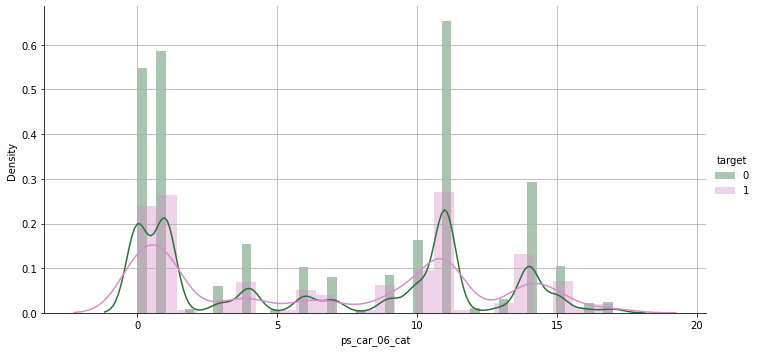

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

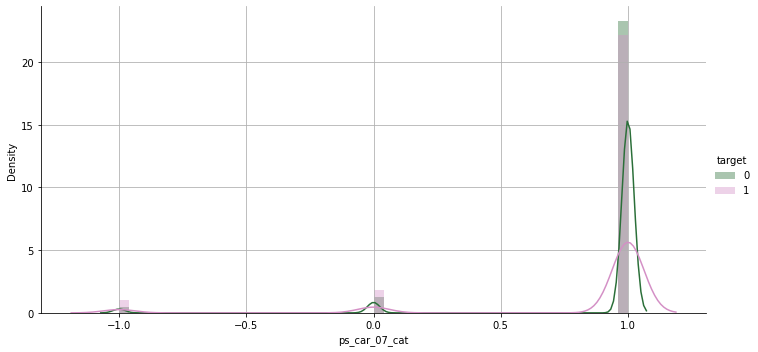

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

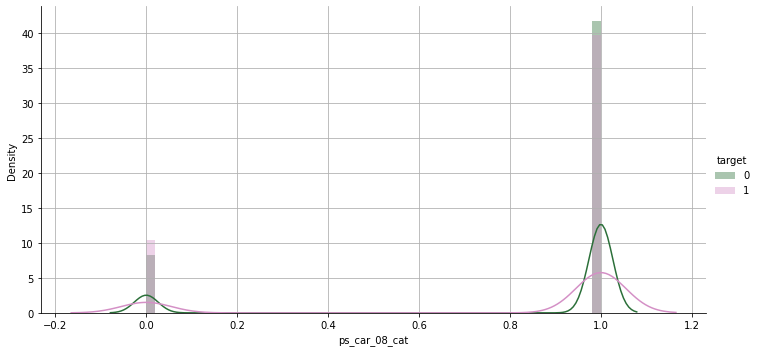

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

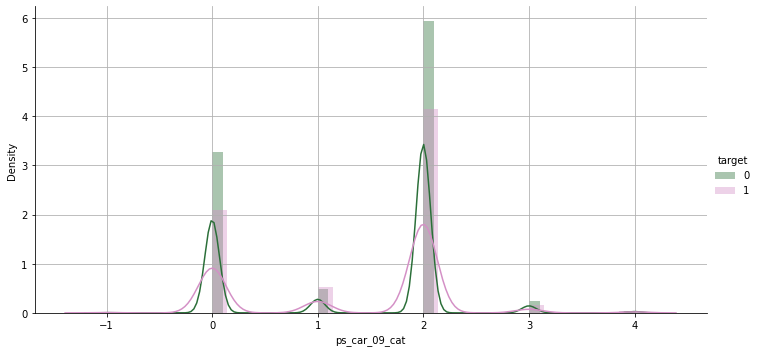

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

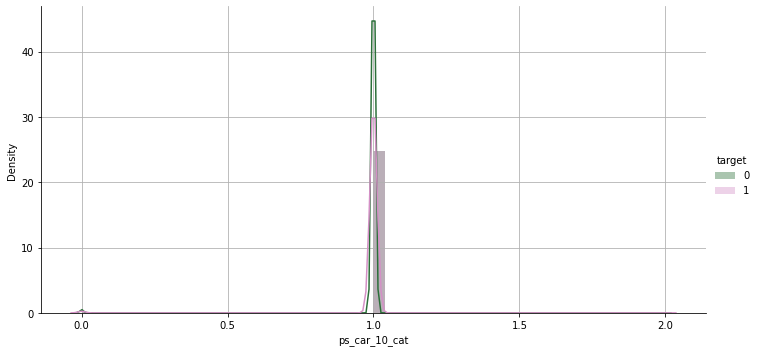

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

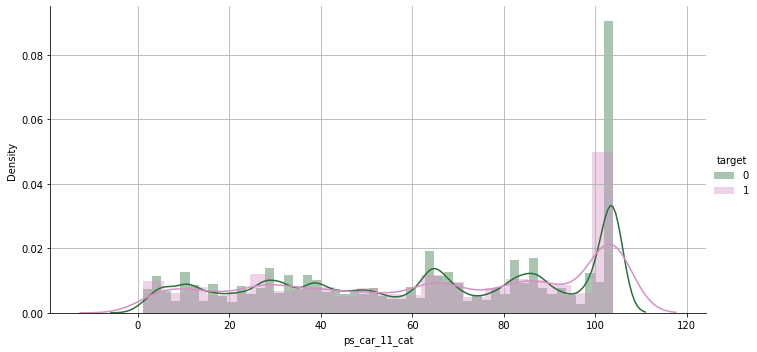

In [ ]:
#@title Univariate Analysis for categorical variables
for c in categorical_features:
    plt.figure()
    sns.FacetGrid(data,hue='target',height=5,aspect=2 , palette='cubehelix').map(sns.distplot,c).add_legend()
    plt.grid()
    plt.show()

  - Important observations here are - 
    - ps_car_01_cat feature with value-7 is profitable and value-9,8 are risky
    - ps_car_03_cat feature with value-1 is much profitable
    - ps_car_04_cat feature with value-1,2,8 are risky
    - ps_car_06_cat feature with value-0,1,11 are much profitable
    - ps_car_09-cat feature with value-0,2 are profitable and value-1 is risky
    - ps_car_11_cat feature with value-103,104 are profitable and value-101,102 are risky

### ---> Write inferences from data on binary variables.

In [ ]:
data[binary_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0
ps_ind_17_bin,595212.0,0.121081,0.326222,0.0,0.0,0.0,0.0,1.0


### ---> Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

In [ ]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
(data['target'].value_counts()/data['target'].count())*100

0    96.355248
1     3.644752
Name: target, dtype: float64

Target Data is not proportionate. Dataset is highly Imbalanced. Only 3.64% of the dataset falls under one category and other category is of 96.36%.

Not to make a mess later, We will look at missing values first

### ---> Missing Values ( MV ) in feautures ?

In [ ]:
MV_counts={}
perc_MV={}
for col in data.columns:
  missing=data[data[col]==-1][col].count()
  if missing>0:
    MV_counts[col]=missing
    missing_percent = (missing/data.shape[0])
    perc_MV[col]=missing_percent
    print("{} column has {} missing values with a percentage of {:.2%} missing values".format(col,missing,missing_percent))

ps_ind_02_cat column has 216 missing values with a percentage of 0.04% missing values
ps_ind_04_cat column has 83 missing values with a percentage of 0.01% missing values
ps_ind_05_cat column has 5809 missing values with a percentage of 0.98% missing values
ps_reg_03 column has 107772 missing values with a percentage of 18.11% missing values
ps_car_01_cat column has 107 missing values with a percentage of 0.02% missing values
ps_car_03_cat column has 411231 missing values with a percentage of 69.09% missing values
ps_car_05_cat column has 266551 missing values with a percentage of 44.78% missing values
ps_car_07_cat column has 11489 missing values with a percentage of 1.93% missing values
ps_car_09_cat column has 569 missing values with a percentage of 0.10% missing values
ps_car_11 column has 5 missing values with a percentage of 0.00% missing values
ps_car_12 column has 1 missing values with a percentage of 0.00% missing values
ps_car_14 column has 42620 missing values with a percent

### ---> Which are the top two features in terms of missing values?

In [ ]:
keys = list(MV_counts.keys()) 
values = list(MV_counts.values()) 
values.sort(reverse=True)
for x in range(0,2):
  for key,val in MV_counts.items():
    if val==values[x]:
        print(key,'column has',val,'missing values with missing value percent of',(values[x]/data.shape[0])*100)


ps_car_03_cat column has 411231 missing values with missing value percent of 69.08983689844963
ps_car_05_cat column has 266551 missing values with missing value percent of 44.78253126617071


I should drop these columns . Because they have many missing values that have %69 and %44 percentage

### ---> What steps should be taken to handle the missing data?

In [ ]:
data.drop(columns=['ps_car_03_cat','ps_car_05_cat'],inplace=True)

In [ ]:
data.shape

(595212, 56)

In [ ]:
#@title - Imputing with the MODE value for Categorical columns
Imputing_Mode = SimpleImputer(missing_values=-1, strategy='most_frequent')

data['ps_ind_02_cat'] = Imputing_Mode.fit_transform(data[['ps_ind_02_cat']]).ravel()
data['ps_ind_04_cat'] = Imputing_Mode.fit_transform(data[['ps_ind_04_cat']]).ravel()
data['ps_car_01_cat'] = Imputing_Mode.fit_transform(data[['ps_car_01_cat']]).ravel()
data['ps_ind_05_cat'] = Imputing_Mode.fit_transform(data[['ps_ind_05_cat']]).ravel()
data['ps_car_07_cat'] = Imputing_Mode.fit_transform(data[['ps_car_07_cat']]).ravel()
data['ps_car_09_cat'] = Imputing_Mode.fit_transform(data[['ps_car_09_cat']]).ravel()

In [ ]:
#@title - Imputing with the MEAN value for Continuous columns
Imputing_Mean= SimpleImputer(missing_values=-1, strategy='mean')

data['ps_reg_03'] = Imputing_Mean.fit_transform(data[['ps_reg_03']]).ravel()
data['ps_car_12'] = Imputing_Mean.fit_transform(data[['ps_car_12']]).ravel()
data['ps_car_14'] = Imputing_Mean.fit_transform(data[['ps_car_14']]).ravel()
data['ps_car_11'] = Imputing_Mean.fit_transform(data[['ps_car_11']]).ravel()

In [ ]:
#@title Outliers detection 

for col in interval_features:
    IQR=iqr(data[col])
    IQR_upperlimit=np.quantile(data[col], 0.75)
    IQR_lowererlimit=np.quantile(data[col], 0.25)
    InDist=0
    Outliers=0
    for i in data[col]:
        if((IQR_lowererlimit-(1.5*IQR))<=i<=(IQR_upperlimit+(1.5*IQR))):
            InDist=InDist+1
        else:
            Outliers=Outliers+1
    if Outliers>0:
      print('****',col,'****')
      print('IQR =',IQR,'||',
            'IQR_lowerlimit =',IQR_lowererlimit,'||',
            'IQR_upperlimit =',IQR_upperlimit)
      print('Max =',data[col].max(),'||','Min =',data[col].min())
      print('Lower Limit =',IQR_lowererlimit-(1.5*IQR),'||',
            'Upper Limit =',IQR_upperlimit+(1.5*IQR))    
      print('Outliers =',Outliers,'||','Into Range =',InDist)



**** ps_ind_14 ****
IQR = 0.0 || IQR_lowerlimit = 0.0 || IQR_upperlimit = 0.0
Max = 4 || Min = 0
Lower Limit = 0.0 || Upper Limit = 0.0
Outliers = 6380 || Into Range = 588832
**** ps_reg_02 ****
IQR = 0.39999999999999997 || IQR_lowerlimit = 0.2 || IQR_upperlimit = 0.6
Max = 1.8 || Min = 0.0
Lower Limit = -0.39999999999999997 || Upper Limit = 1.2
Outliers = 36793 || Into Range = 558419
**** ps_reg_03 ****
IQR = 0.33338541899999996 || IQR_lowerlimit = 0.666614581 || IQR_upperlimit = 1.0
Max = 4.037945022 || Min = 0.061237244
Lower Limit = 0.16653645250000004 || Upper Limit = 1.5000781285
Outliers = 35514 || Into Range = 559698
**** ps_car_11 ****
IQR = 1.0 || IQR_lowerlimit = 2.0 || IQR_upperlimit = 3.0
Max = 3.0 || Min = 0.0
Lower Limit = 0.5 || Upper Limit = 4.5
Outliers = 25983 || Into Range = 569229
**** ps_car_12 ****
IQR = 0.083772234 || IQR_lowerlimit = 0.316227766 || IQR_upperlimit = 0.4
Max = 1.264911064 || Min = 0.1
Lower Limit = 0.19056941500000002 || Upper Limit = 0.525658351

In [ ]:
#@title # any impact when Removing 

"""data = data.loc[
                (data['ps_reg_02']>-0.39999999999999997) & (data['ps_reg_02']<1.2) &
                (data['ps_reg_03']>0.16653645250000004) & (data['ps_reg_03']<1.5000781285) &
                (data['ps_car_12']>0.19056941500000002) & (data['ps_car_12']<0.525658351) &
                (data['ps_car_13']>0.3178808752499999) & (data['ps_car_13']<1.2591761172500002) &
                (data['ps_car_14']>0.2891566494999999) & (data['ps_car_14']<0.4608812935000001) &
                (data['ps_car_15']>1.6627408984999998) & (data['ps_car_15']<4.771237502500001) &
                (data['ps_calc_06']>4.0) & (data['ps_calc_06']<12.0) &
                (data['ps_calc_07']>-1.0) & (data['ps_calc_07']<7.0) &
                (data['ps_calc_08']>5.0) & (data['ps_calc_08']<113.0) &
                (data['ps_calc_09']>-2.0) & (data['ps_calc_09']<6.0) &
                (data['ps_calc_10']>0.0) & (data['ps_calc_10']<16.0) &
                (data['ps_calc_11']>-0.5) & (data['ps_calc_11']<12.0) &
                (data['ps_calc_12']>-0.5) & (data['ps_calc_12']<5.0) &
                (data['ps_calc_13']>-1.0) & (data['ps_calc_13']<7.0) &
                (data['ps_calc_14']>1) & (data['ps_calc_14']<14)
]"""

"data = data.loc[\n                (data['ps_reg_02']>-0.39999999999999997) & (data['ps_reg_02']<1.2) &\n                (data['ps_reg_03']>0.16653645250000004) & (data['ps_reg_03']<1.5000781285) &\n                (data['ps_car_12']>0.19056941500000002) & (data['ps_car_12']<0.525658351) &\n                (data['ps_car_13']>0.3178808752499999) & (data['ps_car_13']<1.2591761172500002) &\n                (data['ps_car_14']>0.2891566494999999) & (data['ps_car_14']<0.4608812935000001) &\n                (data['ps_car_15']>1.6627408984999998) & (data['ps_car_15']<4.771237502500001) &\n                (data['ps_calc_06']>4.0) & (data['ps_calc_06']<12.0) &\n                (data['ps_calc_07']>-1.0) & (data['ps_calc_07']<7.0) &\n                (data['ps_calc_08']>5.0) & (data['ps_calc_08']<113.0) &\n                (data['ps_calc_09']>-2.0) & (data['ps_calc_09']<6.0) &\n                (data['ps_calc_10']>0.0) & (data['ps_calc_10']<16.0) &\n                (data['ps_calc_11']>-0.5) & (data['

### ---> Which interval variables have strong correlation?

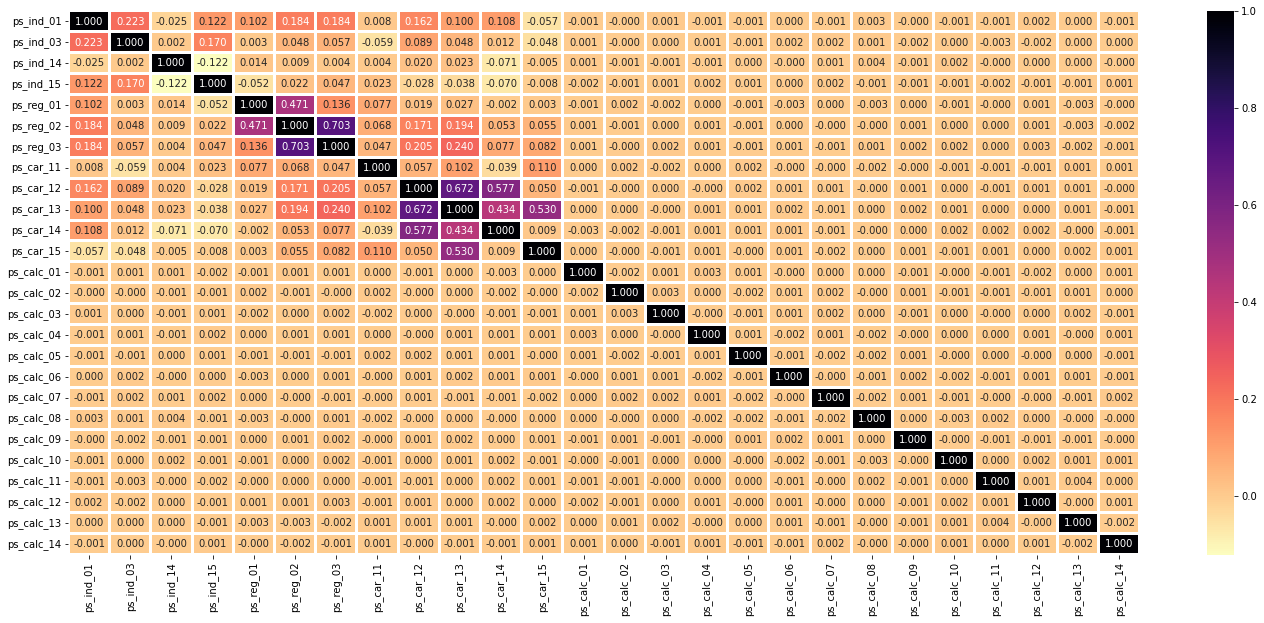

In [ ]:
plt.figure(figsize=(24,10))
sns.heatmap(data[interval_features].corr(),annot=True,cmap='magma_r',fmt='.3f',linewidths=2)
plt.show()

- We will consider correlations which are more than 0.5. See the below
- I will create a sampling and then  visualize the correlations with target variables

In [ ]:
sampling = data.sample(frac=0.1)

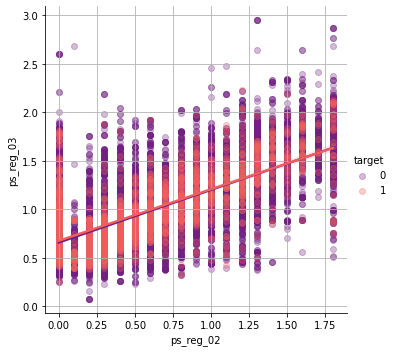

In [ ]:
#@title Highest Correlation of ps_reg_02 & ps_reg_03 (0.703)
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=sampling, hue='target', palette='magma', scatter_kws={'alpha':0.3})
plt.grid()
plt.show()

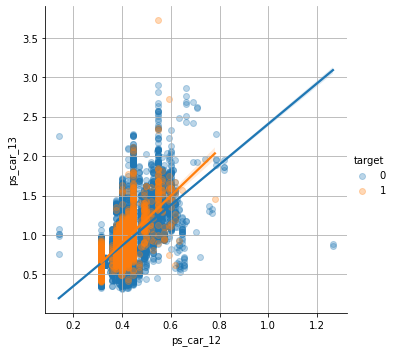

In [ ]:
#@title - Correlation of ps_car_12 & ps_car13 (0.672)
sns.lmplot(x='ps_car_12', y='ps_car_13', data=sampling, hue='target', palette='tab10', scatter_kws={'alpha':0.3})
plt.grid()
plt.show()

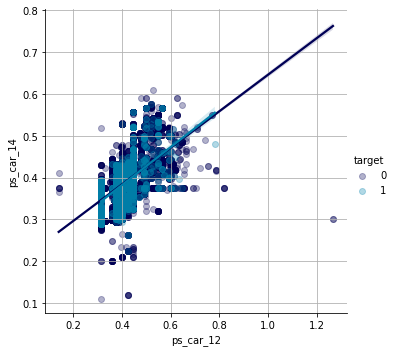

In [ ]:
#@title Correlation of ps_car_12 and ps_car14  ( 0.577 )
sns.lmplot(x='ps_car_12', y='ps_car_14', data=sampling, hue='target', palette='ocean', scatter_kws={'alpha':0.3})
plt.grid()
plt.show()

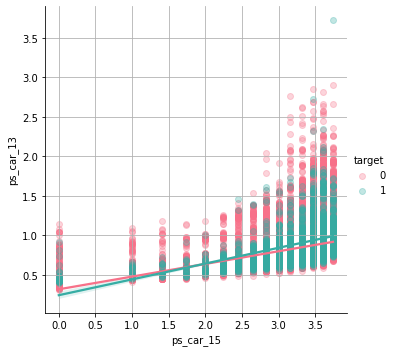

In [ ]:
#@title Correlation of ps_car_13 and ps_car15  ( 0.530 )
sns.lmplot(x='ps_car_15', y='ps_car_13', data=sampling, hue='target', palette='husl', scatter_kws={'alpha':0.3})
plt.grid()
plt.show()

### ---> What's the level of correlation among ordinal features?

In [ ]:
#@title removing some categorical features
categorical_features.remove('ps_car_03_cat')
categorical_features.remove('ps_car_05_cat')

In [ ]:
#@title then Correlate new ones
CorrCatFeat=categorical_features.copy()
CorrCatFeat.append('target')

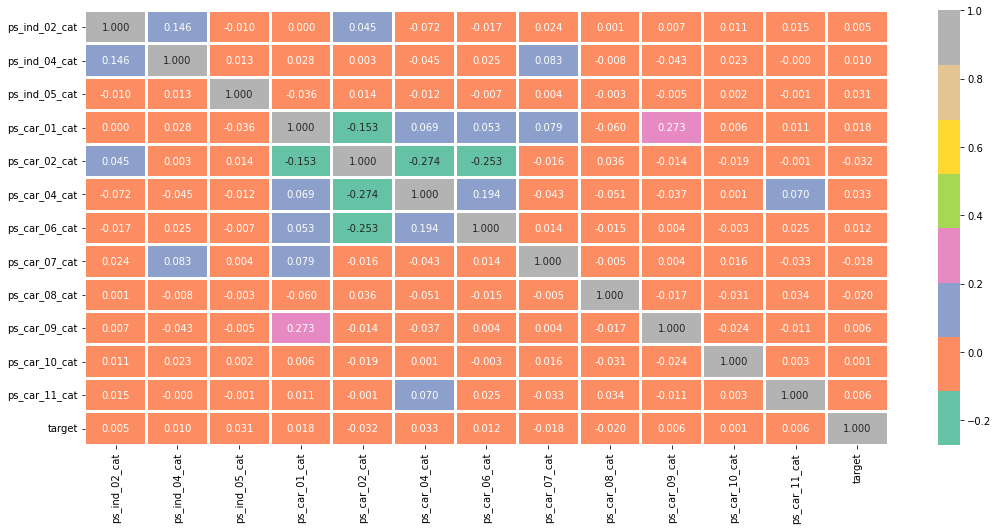

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(data[CorrCatFeat].corr(),annot=True,cmap='Set2',fmt='.3f',linewidths=2)
plt.show()

*Correlations are weak for positive and negative.

*The most correlated are ps_car_09_cat & ps_car_01_cat that are having correlation of +0.273  ( Positive correlation )

*and others ( Negative correlation )
  
- ps_car_02_cat & ps_car_04_cat are having correlation of -0.274
- ps_car_02_cat & ps_car_06_cat are having correlation of -0.253


We will take a limit over than 0.02 when we select the Features that correlated  >= 0.02 ( check the below about it )
        



### ---> Implement Hot Encoding for categorical features

In [ ]:
for c in categorical_features:
    Specific_values = data[c].value_counts().shape[0]
    print('Variable {} has {} SPESIFIC values'.format(c, Specific_values))

Variable ps_ind_02_cat has 4 SPESIFIC values
Variable ps_ind_04_cat has 2 SPESIFIC values
Variable ps_ind_05_cat has 7 SPESIFIC values
Variable ps_car_01_cat has 12 SPESIFIC values
Variable ps_car_02_cat has 2 SPESIFIC values
Variable ps_car_04_cat has 10 SPESIFIC values
Variable ps_car_06_cat has 18 SPESIFIC values
Variable ps_car_07_cat has 2 SPESIFIC values
Variable ps_car_08_cat has 2 SPESIFIC values
Variable ps_car_09_cat has 5 SPESIFIC values
Variable ps_car_10_cat has 3 SPESIFIC values
Variable ps_car_11_cat has 104 SPESIFIC values


In [ ]:
print('Before One-Hot Encoding ')
data.shape

Before One-Hot Encoding 


(595212, 56)

In [ ]:
#@title Get_dummies()
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
print('After One-Hot Encoding we have',data.shape,'variables')

After One-Hot Encoding we have (595212, 203) variables


In [ ]:
encoded_CatFeat = []
for col in data.columns:
  if 'cat' in col:
    encoded_CatFeat.append(col)
print('Encoded Categorical Features ',len(encoded_CatFeat))
print(len(binary_features))
print(len(interval_features))

Encoded Categorical Features  159
17
26


In [ ]:
#@title Correlation between Variables and Target
#Correlation with output variable
CorrTarget = abs(data.corr()["target"])

In [ ]:
#Features that correlated strongly
specific_feat = CorrTarget[CorrTarget>0.02]
specific_feat

target              1.000000
ps_ind_06_bin       0.034017
ps_ind_07_bin       0.034218
ps_ind_15           0.021506
ps_ind_16_bin       0.027778
ps_ind_17_bin       0.037053
ps_reg_01           0.022888
ps_reg_02           0.034800
ps_reg_03           0.031258
ps_car_12           0.038800
ps_car_13           0.053899
ps_car_15           0.027667
ps_ind_05_cat_6     0.023162
ps_car_01_cat_7     0.026892
ps_car_01_cat_11    0.020607
ps_car_02_cat_1     0.031545
ps_car_04_cat_9     0.024675
ps_car_08_cat_1     0.020342
ps_car_09_cat_1     0.024791
Name: target, dtype: float64

In [ ]:
data.shape

(595212, 203)

##### Train Test Split

In [ ]:
#@title Defining x, y  (Regular data )

x=data.loc[:, data.columns != 'target']
y=data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(476169, 202) (476169,) (119043, 202) (119043,)


In [ ]:
#@title Defining X, Y  (For Imbalanced Data - SMOTE  )

X=data.loc[:, data.columns != 'target']
Y=data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

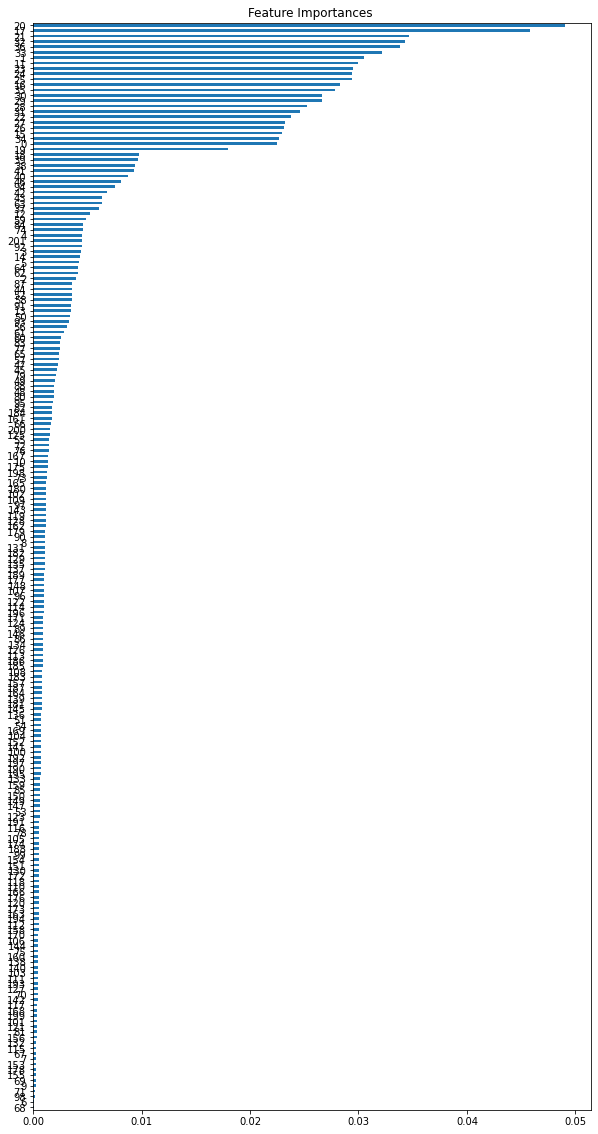

In [ ]:
from matplotlib import colors
RFC = RandomForestClassifier()
RFC.fit(x,y)

feat_importances = pd.Series(RFC.feature_importances_).sort_values(ascending=True)
plt.figure(figsize=(10,20))
feat_importances.plot(kind='barh')
plt.title('Feature Importances ')
plt.show()   

In [ ]:
SFM = SelectFromModel(RFC, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(x.shape[1]))
n_features = SFM.transform(x).shape[1]
print('Number of features after selection: {}'.format(n_features))
featured_labels = x.columns
selected_variables = list(featured_labels[SFM.get_support()])

Number of features before selection: 202


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features after selection: 101


### ---> What should be the preferred way in this case to balance the data?

  - I would prefer to try Over sampling of data first.
Because, we can loose information in under sampling. If our model overfits, then we can try different ratios and undersampling techniques or combination of both.

- Tried different ratios, Under and over sampling to look which one gives better results

To get Balanced data we are approaching to make a balanced dataset out of an imbalanced that is **Sampling Methods** or 
**Re-Sampling Methods** in that we apply two methods Under-Sampling or Over-Sampling, Over-sampling can be used through **SMOTE** Technique as we sampling an existing data sample.

### ---> Standard Scaler

In [ ]:
SMOTE = over_sampling.SMOTE(sampling_strategy='minority')
X_train, Y_train= SMOTE.fit_resample(x_train, y_train)

print(X_train.shape,Y_train.shape)

(917720, 202) (917720,)


# Handling class imbalance using SMOTE based techniques

*   Visualization Resampling



In [ ]:
X, Y = make_classification(n_samples=20000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[0.95, 0.05],
                            class_sep=0.8, random_state=100)

In [ ]:
X1, X2 = list(), list()
for i, j in enumerate(X):
    X1.append(j[0])
    X2.append(j[1])

In [ ]:
df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})
df.head()

,X1,X2,Y
0,-1.011387,1.056458,0
1,-0.407372,0.293590,0
2,-0.711679,0.579483,0
3,-1.564781,0.132817,0
4,0.029581,0.928523,0


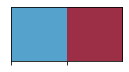

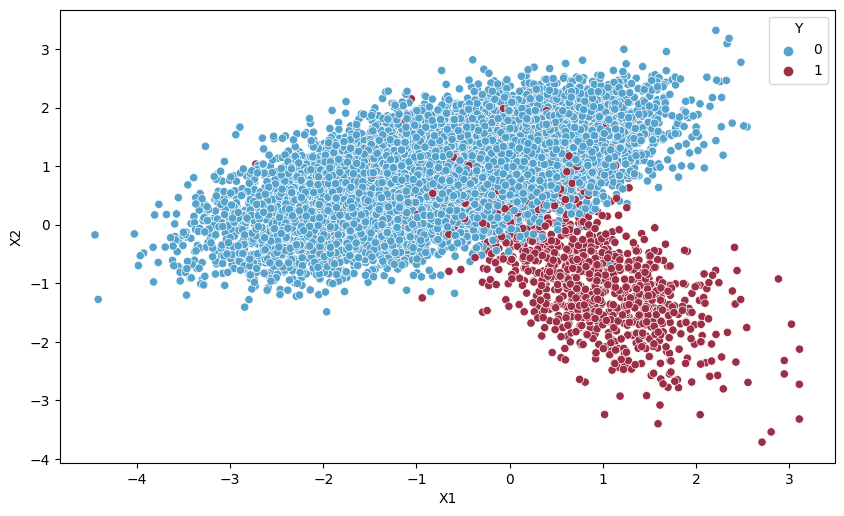

In [ ]:
pal = sns.color_palette('tab10')

sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

# Imblanced Data
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(sampling_strategy='minority')

X_train, Y_train= smt.fit_resample(x_train, y_train)

counter = Counter(Y_train)
print('After',counter)

Before Counter({0: 458860, 1: 17309})
After Counter({0: 458860, 1: 458860})


In [ ]:
print('Original Dataset counts : {}'.format(Counter(y_train)))
print('Resampled Dataset counts : {}'.format(Counter(Y_train)))

Original Dataset counts : Counter({0: 458860, 1: 17309})
Resampled Dataset counts : Counter({0: 458860, 1: 458860})


### --->  Summarize the learnings of ED

  - For most of the Exploratory analysis, Learning are mentioned at their respective sections. Important ones are:-
    - Missing Values are replaced with Mean or Most frequently occured value according to their datatype
    - Imbalance in the dataset is fixed Downsampling the majority class using NearMiss Version-3 algorithm



In [ ]:
X_train=pd.DataFrame(X_train,columns=x.columns)

In [ ]:
#@title #Standardizing training data
X_train = X_train[selected_variables]

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

X_train

array([[ 0.0878251 ,  0.25768842,  1.57725884, ..., -0.08278732,
        -0.1526658 , -0.32798215],
       [-0.9375599 ,  1.00091863, -0.63401134, ..., -0.08278732,
        -0.1526658 , -0.32798215],
       [-0.9375599 , -0.48554179, -0.63401134, ..., -0.08278732,
        -0.1526658 , -0.32798215],
       ...,
       [ 0.0878251 ,  0.25768842,  1.57725884, ..., -0.08278732,
        -0.1526658 , -0.32798215],
       [ 1.62590259,  1.00091863, -0.63401134, ..., -0.08278732,
        -0.1526658 , -0.32798215],
       [-0.9375599 , -0.48554179,  1.57725884, ..., -0.08278732,
        -0.1526658 , -0.32798215]])

In [ ]:
X_train.shape

(917720, 101)

In [ ]:
#@title #Standardizing TEST data
X_test = X_test[selected_variables]

X_test=scaler.transform(X_test)

print(X_test)

[[ 1.1132101   0.25768842  1.57725884 ... -0.08278732 -0.1526658
  -0.32798215]
 [ 2.13859509  2.11576395 -0.63401134 ... -0.08278732 -0.1526658
   3.04894644]
 [ 1.1132101   1.74414885 -0.63401134 ... -0.08278732 -0.1526658
  -0.32798215]
 ...
 [-0.4248674   0.62930353  1.57725884 ... -0.08278732 -0.1526658
  -0.32798215]
 [ 2.13859509  1.74414885 -0.63401134 ... -0.08278732 -0.1526658
  -0.32798215]
 [-0.4248674  -0.11392668  1.57725884 ... -0.08278732 -0.1526658
  -0.32798215]]


#Modeling

In [ ]:
#@title #Comparison between Data Models
predictions=pd.DataFrame()
AccuracyScore_dict={}
PrecisionScore_dict={}
RecallScore_dict={}
R2Score_dict={}
F1Score_dict={}
ROCAUCscore_dict={}

In [ ]:
def Model_Evaluation(modelInstance,ModelName,x_train,y_train,x_test,y_test,y_pred):
  predictions[ModelName] = y_pred

  print(ModelName,'Model:-')

  AccuracyScore = accuracy_score(y_test,y_pred)
  PrecisionScore = precision_score(y_test,y_pred)
  RecallScore = recall_score(y_test,y_pred)
  F1Score = f1_score(y_test,y_pred)  
  ROCAUCscore = roc_auc_score(y_test,y_pred)

  print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
  print('Classification Report : \n' + classification_report(y_test,y_pred)) 
  print("Accuracy Score: ", AccuracyScore)
  print("Precision Score: ", PrecisionScore)
  print('Recall Score :', RecallScore)  
  print('F1 Score :', F1Score)
  print('ROC AUC score :', ROCAUCscore)

  AccuracyScore_dict[ModelName] = AccuracyScore
  PrecisionScore_dict[ModelName] = PrecisionScore
  RecallScore_dict[ModelName] =  RecallScore
  F1Score_dict[ModelName] = F1Score
  ROCAUCscore_dict[ModelName] = ROCAUCscore

### Model 1 - Logistic Regression
*   Original Data




In [ ]:
logrec = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred = logrec.predict(x_test)

Model_Evaluation(logrec,'Original_Data_LogisticRegression',x_train,y_train,x_test,y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Original_Data_LogisticRegression Model:-
Confusion Matrix : 
[[114658      0]
 [  4385      0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

Accuracy Score:  0.9631645707853465
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.5


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even though the accuracy is coming as 96% which is very high but still we can't comment that the model is accurate as it's a classification model and accuracy is seen with the precision and recall values and here pecision and recall values are zero which is not good.


f1 score is 0 because precision and recall values are zero



*   Resampled Data

In [ ]:
LOGREC = LogisticRegression(random_state=0).fit(X_train,Y_train)
y_pred = LOGREC.predict(X_test)

Model_Evaluation(LOGREC,'Resampled_Data_LogisticRegression',X_train,Y_train,X_test,y_test,y_pred)

Resampled_Data_LogisticRegression Model:-
Confusion Matrix : 
[[111368   3290]
 [  4247    138]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    114658
           1       0.04      0.03      0.04      4385

    accuracy                           0.94    119043
   macro avg       0.50      0.50      0.50    119043
weighted avg       0.93      0.94      0.93    119043

Accuracy Score:  0.9366867434456457
Precision Score:  0.040256709451575265
Recall Score : 0.0314709236031927
F1 Score : 0.03532573915269423
ROC AUC score : 0.5013884472016557


As can be seen from the confusion matrix we have False Negative = 3295 which is wrongly predicted as it's the number of people who shouldn't be given the insurance but with prediction they were provided. This high number for FN will lead to loss for the company so for a good model we should have High TP and High TN and low FP and FN.

As compared to the previous model where precision and recall were both 0 but here precision = 0.04 and recall = 0.03 which has lead to an improved a little for f1-score.

**Logistic Regression with GridSearch CV**

In [ ]:
LR=LogisticRegression()
param_grid_LR = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,2,5],'solver':['liblinear']}

GS = GridSearchCV(estimator = LR, param_grid=param_grid_LR, cv=3, verbose=2)   
LR_GS = GS.fit(X_train, Y_train)
Y_pred = LR_GS.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
LR_GS.best_estimator_

In [ ]:
Model_Evaluation(LR_GS,'LogisticRegression Cross Vaildation',X_train,Y_train,X_test,y_test,y_pred)

### Model 2 - XGB Classifier

In [ ]:
#XGB=XGBClassifier()
#param_grid_XGB = {"objective":["binary:logistic"],
                  'colsample_bytree': [0.7],
                  'learning_rate': [0.1],
                  'max_depth': [10], 
                  'alpha': [5], 
                  'n_estimators':[1000,2000]}

In [ ]:
#GS = GridSearchCV(estimator=XGB, param_grid=param_grid_XGB, cv=3,verbose=2)
#XGB_GS=GS.fit(X_train, Y_train)
#print('XGB best estimator  : ',XGB_GS.best_estimator_)
#y_pred = XGB_GS.predict(X_test)

In [ ]:
#XGB_GS.best_estimator_

In [ ]:
#Model_Evaluation(XGB_GS,'XGB',X_train,Y_train,X_test,y_test,y_pred)

Best Parameters in XGBoost 
 
* n_estimators=1000, 
  

### Model 3 - Random Forest Classifier

In [ ]:
#Implementing RandomForestClassifier
RFC1=RandomForestClassifier()
RFC1_param_grid = {'n_estimators': [1200],
                  'max_features': [30],
                  'min_samples_leaf': [1]}

In [ ]:
RFC1_GS.best_estimator_

In [ ]:
Model_Evaluation(RFC1_GS,'Random Forest Classifier',X_train,Y_train,X_test,y_test,y_pred)

### Model 4 - Linear SVC

In [ ]:
#@title with Dual False max-iter=500
L_SVC= LinearSVC()
param_grid_L_SVC = {'dual': [False], 
                  'max_iter':[500]}

In [ ]:
GS = GridSearchCV(estimator=L_SVC, param_grid=param_grid_L_SVC, cv=3,verbose=2)
L_SVC_GS=GS.fit(X_train, Y_train)
print('L_SVC best estimator  : ',L_SVC_GS.best_estimator_)
y_pred = L_SVC_GS.predict(X_test)

In [ ]:
L_SVC_GS.best_estimator_

In [ ]:
Model_Evaluation(L_SVC_GS,'L_SVC',X_train,Y_train,X_test,y_test,y_pred)

**SVC with Imbalance check, Feature importance and 100k Records**

In [ ]:
n =  100000
Indexing= np.random.choice(X_train.shape[0], n, replace=False)  

X_train_1 = X_train[indexing]
Y_train_1 = Y_train[indexing]

In [ ]:
SVMc = SVC()
SVMc= SVMc.fit(X_train_1, Y_train_1)
y_pred = SVMc.predict(X_test)

In [ ]:
Model_Evaluation(SVMc,'SVCwith Imbalanced ',X_train_1,Y_train_1,X_test,y_test,y_pred)

### Model 5 - Gradient Boost Classifier

In [ ]:
GBC=GradientBoostingClassifier()
param_grid_GBC = {'n_estimators': [1500],
                  'learning_rate': [0.01,0.1],
                  'max_features':[10,30]}

In [ ]:
GS = GridSearchCV(estimator=GBC, param_grid=param_grid_L_SVC, cv=3,verbose=2)
GBC_GS=GS.fit(X_train, Y_train)
print('GBC best estimator  : ',GBC_GS.best_estimator_)
y_pred = GBC_GS.predict(X_test)

In [ ]:
GBC_GS.best_estimator_

In [ ]:
Model_Evaluation(GBC_GS,'Random Forest Classifier',X_train,Y_train,X_test,y_test,y_pred)

### Model 6 - ADA Boost  Classifier

In [ ]:
ADA= AdaBoostClassifier()
param_grid_XGB = {'learning_rate': [0.01,0.1], 
                  'n_estimators':[1000,2000]}

In [ ]:
GS = GridSearchCV(estimator=ADA,param_grid=param_grid_ADA, cv=3,verbose=2)
ADA_GS=GS.fit(X_train, Y_train)
print('ADA best estimator  : ',ADA_GS.best_estimator_)
y_pred = ADA_GS.predict(X_test)

In [ ]:
ADA_GS.best_estimator_

In [ ]:
Model_Evaluation(ADA_GS,'ADA',X_train,Y_train,X_test,y_test,y_pred)

### Model 7 - Extra Trees Classsifier

In [ ]:
ETC=ExtraTreesClassifier()
param_grid_ETC = {'n_estimators': [1500],
                  'max_features':[30]}                 }

In [ ]:
GS = GridSearchCV(estimator=ETC, param_grid=param_grid_ETC, cv=3,verbose=2)
ETC_GS=GS.fit(X_train, Y_train)
print(ETC best estimator  : ',ETC_GS.best_estimator_)
y_pred = ETC_GS.predict(X_test)

In [ ]:
ETC_GS.best_estimator_

In [ ]:
Model_Evaluation(ETC_GS,'Extra Trees Classifier',X_train,Y_train,X_test,y_test,y_pred)

### Model 8 - MLP Classifier

In [ ]:
MLPC= MLPClassifier(hidden_layer_sizes=(102,500,2), max_iter=500,activation ='relu',solver='adam',random_state=1, tol=0.000000001,alpha=0.0001 )
MLPC.fit(X_train, Y_train)
y_pred = MLPC.predict(X_test)

In [ ]:
Model_Evaluation(MLPC,'MLP_Classifier',X_train,Y_train,X_test,y_test,y_pred)

# ANOTHER WAY to see the results with/without SMOTE in XGBOOST 

In [ ]:
classifiers = {
    "DummyClassifier_most_frequent": DummyClassifier(strategy='most_frequent', random_state=0),
    "LogisticRegression": LogisticRegression(solver = 'lbfgs', max_iter=1000),
    "LGBMClassifier": LGBMClassifier(),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(3),    
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB(),
}

In [ ]:
data_models = pd.DataFrame(columns=['model', 'run_time', 'avg_pre', 'avg_pre_std'])

In [ ]:
for key in classifiers:

    print('*',key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(X_train, Y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scorer = make_scorer(average_precision_score)
    cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring=scorer)
    Y_pred = model.predict(X_test)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'avg_pre': cv_scores.mean(),
           'avg_pre_std': cv_scores.std(),
    }

    data_models = data_models.append(row, ignore_index=True)
* DummyClassifier_most_frequent
* LogisticRegression
* LGBMClassifier
* XGBClassifier
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* GaussianNB

In [ ]:
data_models.head(10).sort_values(by='avg_pre')

In [ ]:
data_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])

classifier = XGBClassifier(random_state=123)
model = classifier.fit(X_train, Y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'XGBClassifier without SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }

data_result = data_result.append(row, ignore_index=True)
data_result.head()

In [ ]:
avg_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: ~{0:0.4f}'.format(avg_precision))

Fit a model using SMOTE

In [ ]:
oversampled = SMOTE(random_state=0)
X_train, Y_train= oversampled.fit_resample(x_train, y_train)

In [ ]:
Y_train.value_counts()

In [ ]:
classifier = XGBClassifier(random_state=0)
model = classifier.fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'XGBClassifier with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),       
    }

In [ ]:
data_result = data_result.append(row, ignore_index=True)
data_result.head()

In [ ]:
avg_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: ~{0:0.4f}'.format(avg_precision))